In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('adult.csv')
df.head(4)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [5]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

<Axes: ylabel='count'>

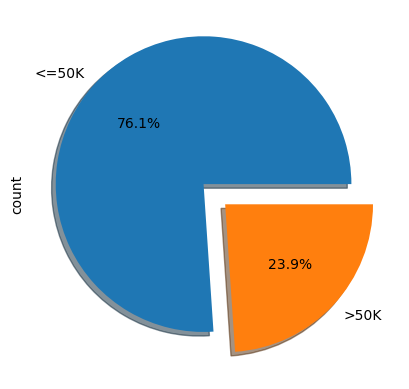

In [6]:
df['income'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.1, 0.1], shadow=True)

<Axes: ylabel='count'>

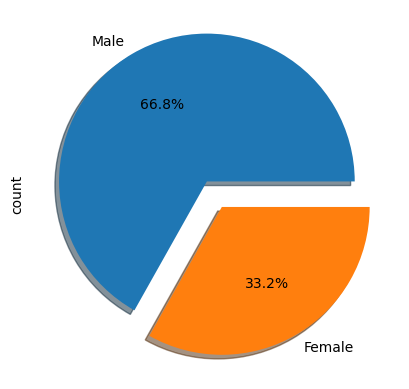

In [7]:
df['gender'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.1, 0.1], shadow=True)

<Axes: ylabel='count'>

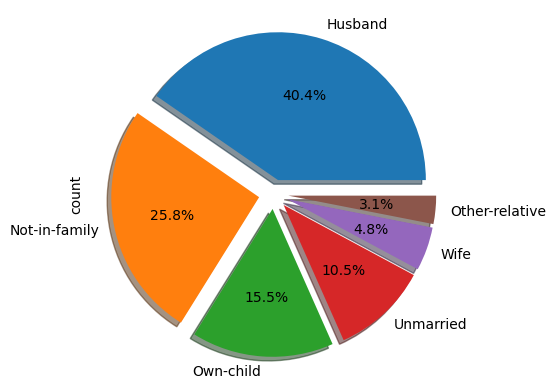

In [8]:
df['relationship'].value_counts().plot(kind='pie', autopct="%0.1f%%", explode=[0.1,0.1, 0.1, 0.1 ,0.1, 0.1], shadow=True)

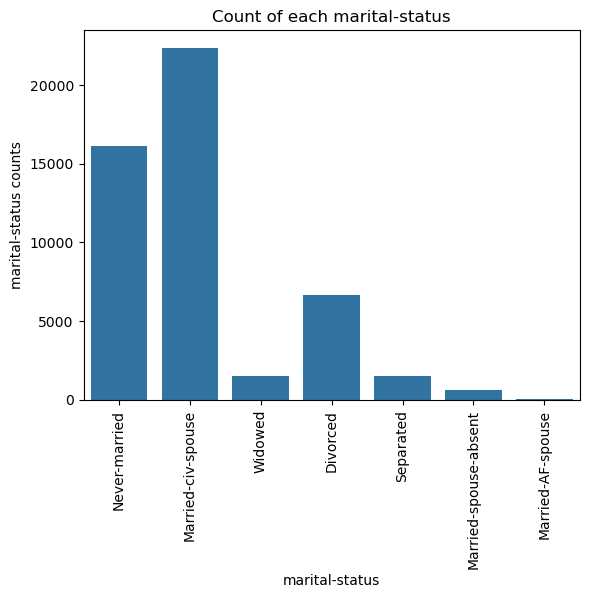

In [9]:
sns.countplot(data =df , x= 'marital-status')
plt.title('Count of each marital-status')
plt.xlabel('marital-status')
plt.ylabel('marital-status counts')
plt.xticks(rotation=90) 
plt.show()

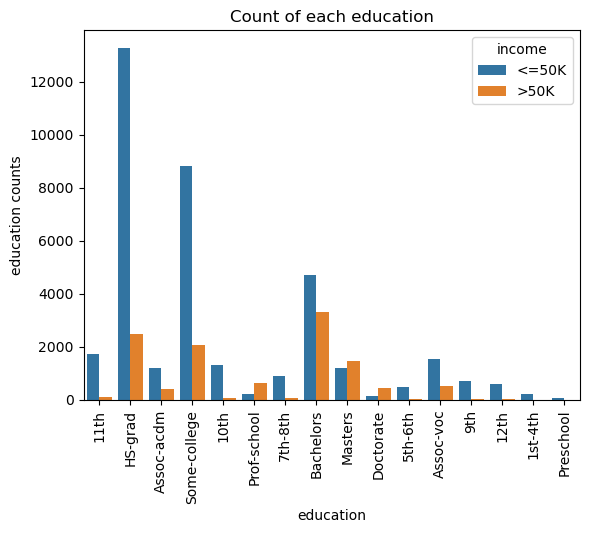

In [10]:
sns.countplot(data =df , x= 'education' ,hue='income')
plt.title('Count of each education')
plt.xlabel('education')
plt.ylabel('education counts')
plt.xticks(rotation=90) 
plt.show()


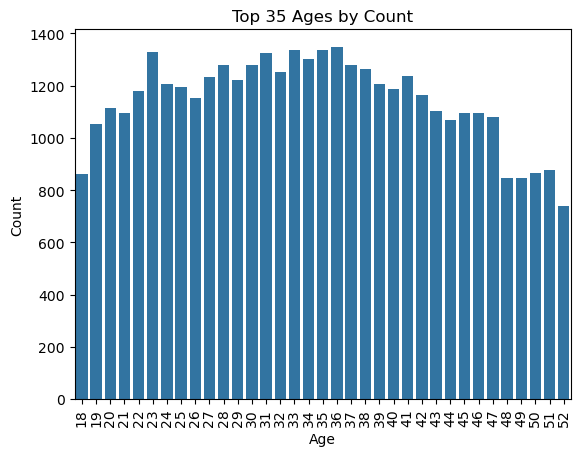

In [11]:
top_ages = df['age'].value_counts().head(35).index

filtered_df = df[df['age'].isin(top_ages)]

sns.countplot(data=filtered_df, x='age')
plt.title('Top 35 Ages by Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_3336\564815396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_occupations.values, y=top_occupations.index, palette='viridis')


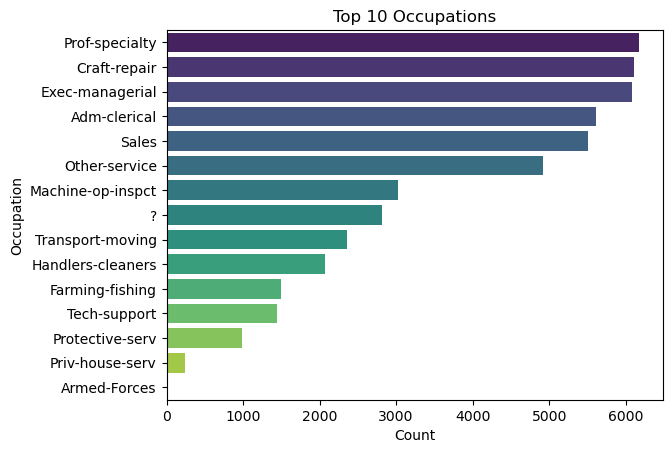

In [12]:
top_occupations = df['occupation'].value_counts().head(35)
sns.barplot(x=top_occupations.values, y=top_occupations.index, palette='viridis')
plt.title('Top 10 Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

In [13]:
df=df.drop(['fnlwgt'],axis=1)

In [14]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'gender', 'native-country', 'income']


# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply one-hot encoding to the categorical columns
encoded_values = encoder.fit_transform(df[categorical_columns])

# Convert the encoded values to a DataFrame and concatenate with the original data (excluding original categorical columns)
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Check the resulting DataFrame
df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,7,0,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38,9,0,0,50,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,28,12,0,0,40,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,44,10,7688,0,40,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,18,10,0,0,30,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Identify numeric columns for scaling
numeric_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

# Apply scaling to numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Check the result
df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-0.995129,7,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.046942,9,-0.144804,-0.217127,0.772930,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.776316,12,-0.144804,-0.217127,-0.034087,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.390683,10,0.886874,-0.217127,-0.034087,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.505691,10,-0.144804,-0.217127,-0.841104,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
X=df.drop(['income_>50K'],axis=1)
y=df['income_>50K']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(39073, 99)
(9769, 99)
(39073,)
(9769,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_pred = model.predict(X_test)

Accuracy: 85.38%
Confusion Matrix:


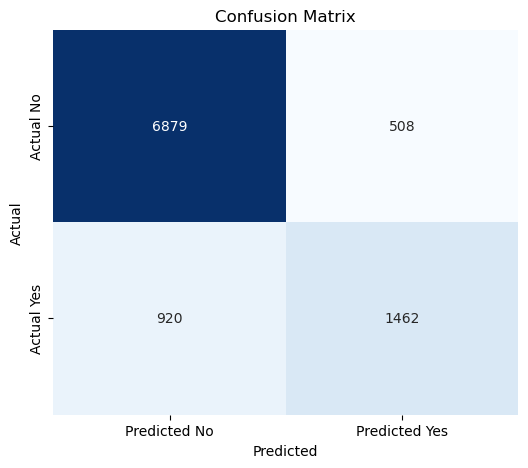

In [19]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [21]:
y_pred = model.predict(X_test)

Accuracy: 82.35%
Confusion Matrix:


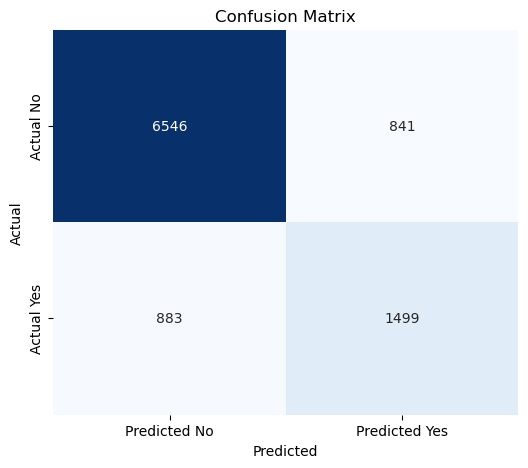

In [22]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)

Accuracy: 84.83%
Confusion Matrix:


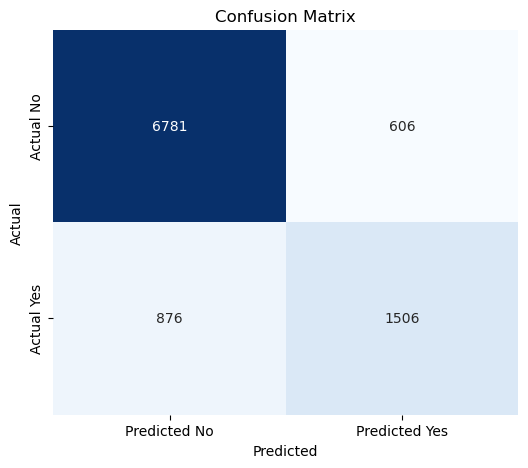

In [25]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
df = pd.read_csv('adult.csv')
df.columns = df.columns.str.strip()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import joblib

# Encoding categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Split data
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model and encoders
joblib.dump(model, 'income_predictor.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [28]:
import tkinter as tk
from tkinter import ttk
import joblib
import pandas as pd

# Load model and encoders
model = joblib.load('income_predictor.pkl')
label_encoders = joblib.load('label_encoders.pkl')

# GUI
root = tk.Tk()
root.title("Income Prediction App")

entries = {}

# Sample fields — customize based on your dataset
fields = ['age', 'workclass', 'education', 'hours-per-week', 'gender', 'occupation']

for idx, field in enumerate(fields):
    label = tk.Label(root, text=field)
    label.grid(row=idx, column=0)
    
    if field in label_encoders:
        combo = ttk.Combobox(root, values=label_encoders[field].classes_.tolist())
        combo.grid(row=idx, column=1)
        entries[field] = combo
    else:
        entry = tk.Entry(root)
        entry.grid(row=idx, column=1)
        entries[field] = entry

def predict():
    input_data = {}
    for field in fields:
        val = entries[field].get()
        if field in label_encoders:
            val = label_encoders[field].transform([val])[0]
        else:
            val = float(val)
        input_data[field] = val
    
    df_input = pd.DataFrame([input_data])
    pred = model.predict(df_input)[0]
    result = "<=50K" if pred == 0 else ">50K"
    result_label.config(text=f"Predicted Income: {result}")

btn = tk.Button(root, text="Predict", command=predict)
btn.grid(row=len(fields), column=0, columnspan=2)

result_label = tk.Label(root, text="")
result_label.grid(row=len(fields)+1, column=0, columnspan=2)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_3336\3309019892.py", line 43, in predict
    pred = model.predict(df_input)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 904, in predict
    proba = self.predict_proba(X)
            ^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 946, in predict_proba
    X = self._validate_X_predict(X)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 641, in _validate_X_predict
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 608, in _validate_data
    self._che